## 5. Представљање података на мапи света

Претходно смо видели пар начина да неке од података о успешности на олимпијским играма представимо графички. Међутим, у свим тим начинима информацију о држави сводили смо на име, "категорију" података и тим именом смо обележавали одговарајуће стубиће или тачкице. Тако смо заборављали на разна друга знања која ми имамо о државама, тако и на пример где се оне налазе на мапи света. У наставку ћемо видети како можемо да истакнемо државе добитнице медаља на мапи уз помоћ библиотеке [geopandas](https://geopandas.org/docs.html). 

Ова библиотека нам је од користи када год учитварамо или манипулишемо подацима у којима очекујемо да ће се наћи геометријски подаци, а облик држава је управо такав податак. Иако у пајтону можемо читати податке из фајлова на много различитих начина, предности коришћења библиотека попут библиотеке `pandas` или `geopandas` леже у томе што је са подацима аутоматски учитан и препознат и њихов формат, као и чињеница да обе библиотеке садрже прегршт функција оптимизованих за податке са којима знају да баратају. Тако када у подацима који су нам на располагању имамо податке о геометрији, `geopandas` је одличан избор. Сличност ове две библиотеке није само у имену, као што ћемо видети и логика коришћење и манипулација података у оквиру геопандас библиотеке је доста слична свему на шта смо навикли код панда. У локалном фолдеру са подацима, поред података о спорту имамо припремљене податке о мапи света, тј. контурама држава. Учитаћемо те податке уз помоћ функције [read_file](https://geopandas.org/en/stable/docs/reference/api/geopandas.read_file.html) библиотеке `geopandas`:

In [1]:
# ucitavanje neophodnih biblioteka za rad sa podacima u nastavku

import pandas as pd # manipulacija tabelarnim podacima
import geopandas as gpd # manipulacija tabelarnim podacima koji sadrze geometrijske informacije
import matplotlib.pyplot as plt # data vizualizacija

In [2]:
svet = gpd.read_file('sport_podaci/mapa_sveta.xlsx') # učitavanje fajla koji sadrži geometrijske podatke o svetskim državama
svet.head() # prikaz prvih 5 redova

,continent,name,iso_a3,geometry
0,Oceania,Fiji,FJI,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000..."
1,Africa,Tanzania,TZA,"POLYGON ((33.90371 -0.95000, 34.07262 -1.05982..."
2,Africa,W. Sahara,ESH,"POLYGON ((-8.66559 27.65643, -8.66512 27.58948..."
3,North America,Canada,CAN,"MULTIPOLYGON (((-122.84000 49.00000, -122.9742..."
4,North America,United States of America,USA,"MULTIPOLYGON (((-122.84000 49.00000, -120.0000..."


Првих 5 редова смо проверили на исти начин као што смо то радили до сада и на први поглед нам делује као да је у питању још једна табела слична онима које смо до сада користили. Видимо да колона са називом `iso_a3` садржи скраћено име земаља у виду три слова, на која смо наилазили и у до сада анализираним олимпијским подацима (тамо у колони `NOC`), ова скраћеница у називу колоне упућује на [стандард](https://en.wikipedia.org/wiki/ISO_3166-1_alpha-3) по коме су трословне скраћенице имена држава настале. Једна колона делује необичније него остале, па хајде да проверимо да ли има више информација о колонама и типовима података у њима (то је такође исто као у `pandas` библиотеци):

In [3]:
svet.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 176 entries, 0 to 175
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype   
---  ------     --------------  -----   
 0   continent  176 non-null    object  
 1   name       176 non-null    object  
 2   iso_a3     176 non-null    object  
 3   geometry   176 non-null    geometry
dtypes: geometry(1), object(3)
memory usage: 5.6+ KB


Видимо да колона чији су први уноси садржале кључне речи "полигон" садржи геометријски тип података. Више на ту тему можете прочитати у [документацији](https://geopandas.org/docs/reference/api/geopandas.GeoSeries.html), а ми ћемо у наставку практично приказати тај садржај.
Као што смо најавили подаци садрже "мапу света" тако да поред имена сваке земље имамо неке информације о томе како нацртати контуре те земље. То можемо тестирати тако што искористимо функцију [plot](https://geopandas.org/mapping.html) над целим скупом података или на земљама по избору. Ево на пример једне од земаља карактеристичног облика:

    continent   name iso_a3                                           geometry
141    Europe  Italy    ITA  MULTIPOLYGON (((10.44270 46.89355, 11.04856 46...


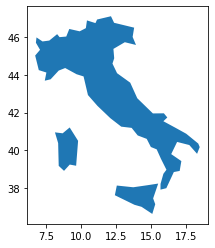

In [4]:
svet[svet.name=='Italy'].plot() # selektujemo red tabele koji u koloni ime sadrzi rec "Italy" i crtamo red plot funkcijom
print(svet[svet.name=='Italy']) # stampamo selektovani red tabele koji smo i nacrtali

Поред цртања облика Италије (које функција обавља на основу података у колони геометрија, енг. *geometry*) одштампали смо и саджај датог реда у подацима да се уверимо да у њему није постојало ништа друго што би могло подстаћи цртање овог карактеристичног облика осим поља у колони геометрија. Видимо да је у питању више полигона (енг. *MULTIPOLYGON*), односно изломљених затворених линија, што видимо и на цртежу (Италија међу територијама поред полуострва има и 2 острва, тако да је то 3 полигона). За потребе које ћемо ми користити у наставку, размишљајте о овој колони као о низу координата тачака које треба спојити да би се на мапи добио облик земље коју хоћете да нацртате (што је практично све што се налази у нашем скупу података), али ова библиотека има далеко више могућности за цртање које вам препоручујемо да наставите да истражујете.

Гледајући слику Италије сигурно примећујете и да она није превише детаљна. Ако сте гледали неке друге мапе или сателитске слике видели сте много мање оштрих ивица, али ово је ниво детаљности који нам је потребан када цртамо цео свет. Када за који тренутак на истом цртежу видимо све земље, неће бити потребе да свака појединачна земља буде нацртана детаљније ни прецизније од овога што видимо на примеру Италије. Као што смо применили функцију `plot()` на један ред података, тако је можемо искористити да видимо све земље у скупу података `svet`:

<AxesSubplot:>

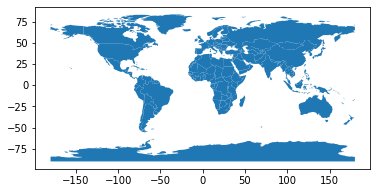

In [5]:
svet.plot() # crtamo mapu sveta

Иако су све једнако грубо нацртане као Италија, једноставном функцијом добили смо одличну мапу света, али је ипак можемо још мало прилагодити за наше потребе. 

Зато што нам је фокус на представљање држава добитница медаља на олимпијадама, није потребно да тако велики део слике буде Јужни пол који је ненасељен. Стога ћемо искључити ред посвећен Антарктику из података и нацртати још једном ову мапу пре него што кренемо да је бојимо.

<AxesSubplot:>

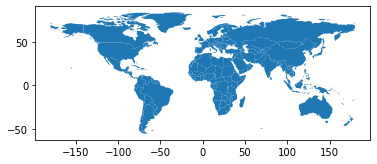

In [6]:
svet = svet[(svet.name!="Antarctica")] # slektujemo redove tabele svet, tako da ime teritorije NIJE Antarktik i to čuvamo ponovo u promenljivoj svet
svet.plot() # crtamo ovaj izmenjeni svet

Као што сте видели, када имате одговарајући фајл са геометријским подацима, цртање неме карте је врло једноставно. Кључно је дакле доћи до геометријских података, али су и они лако доступни, нпр. [овде](https://opendata.geosrbija.rs/) можете наћи податке о Србији са поделом на општине и  округе, а један пример њихове употребе можете наћи [овде](https://petlja.org/biblioteka/r/lekcije/jupyterRadneSveske_srb/srednjo%C5%A1kolci-u-republici-srbiji-3). 

Једна ствар на коју додатно треба обратити пажњу је [тип пројекције](https://en.wikipedia.org/wiki/List_of_map_projections), односно увек освестити чињеницу да се свет настанио на облику сличном лопти и да када покушавамо то да нацртамо на дводимензионој површини попут нашег дисплеја, неке ствари ће изгледати издуженије него што су стварно, или веће/мање него што су стварно, те зависно од тога на шта желите да се фокусирате треба одабрати одговарајућу пројекцију.

Сада је време да различите државе обојимо тако да истакнемо оне које су освојиле више медаља. И то ће бити прилично једноставно, али је пре цртања неопходно у једну исту табелу сместити и податке о геометрији земаља (управо дискутована табела `svet`) и податке о медаљама које смо претходно припремили. 

<details>    
<summary>
    <font color="darkgreen"><b>Да ли се сећате којом функцијом спајамо табеле?</b>
</font>
</summary>
У питању је функција merge, можете се подсетити о њеним особинама у документацији овде https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.merge.html.

Учитавамо претходно припрељене податке са бројем медаља по земљама:

In [7]:
sve_medalje = pd.read_csv('sport_podaci/oi2012_medalje_po_zemljama.csv') 
sve_medalje.head(2)

,NOC,Gold,Silver,Bronze,Total,Team,Broj_timova,Uspesnost_timova
0,USA,46,28,29,103,United States,245,42.040816
1,CHN,38,27,23,88,China,206,42.718447


Спајамо табеле са информацијама о медаљама са табелом у којој се налазе географски подаци. Зато што се колоне које садрже податке по којима ћемо спајати табеле (име државе) не зову исто у различитим табелама, користићемо мало другачији формат у функцији `merge`. Коришћењем аргумената `left` и `right` обележићемо 2 табеле као леву и десну табелу за спајање, а затим ће и претходно коришћени аргумент `on`(колона по којој спајамо табеле) добити своју леву и десну верзију у виду аргумената `left_on` и `right_on`. Ово значи да ћемо на пример спајајући податке о Кини, у табели `sve_medalje` тражити име `China` у колони `Team`, а у табели `svet` тражити исто име у колони `name`. Када нађемо одговарајуће редове, њих ћемо спојити и тај процес ћемо наставити за све земље. Сетите се, ако не искористимо аргумент `how`, процес спајања направиће табелу која садржи само државе чија се имена налазе и у једној и у другој листи. У овом случају, ми желимо да нађемо географске податке за све земље за које имамо податке о медаљама, зато ћемо искористити `how='left'`.

In [8]:
svet_medalja = pd.merge(left = sve_medalje, right = svet, left_on = 'Team', right_on = 'name',how='left') # spajanje tabela i cuvanje rezultata u novoj promenljivoj
svet_medalja.head()

,NOC,Gold,Silver,Bronze,Total,Team,Broj_timova,Uspesnost_timova,continent,name,iso_a3,geometry
0,USA,46,28,29,103,United States,245,42.040816,NaN,NaN,NaN,None
1,CHN,38,27,23,88,China,206,42.718447,Asia,China,CHN,"MULTIPOLYGON (((109.47521 18.19770, 108.65521 ..."
2,RUS,24,26,32,82,Russia,238,34.453782,Europe,Russia,RUS,"MULTIPOLYGON (((178.72530 71.09880, 180.00000 ..."
3,GBR,29,17,19,65,Great Britain,249,26.104418,NaN,NaN,NaN,None
4,GER,11,19,14,44,Germany,213,20.657277,Europe,Germany,DEU,"POLYGON ((14.11969 53.75703, 14.35332 53.24817..."


Већ у првим редовима, видимо примере држава код којих није дошло до спајања (нпр. Америка, Велика Британија), да би видели колико је таквих примера, погледајмо попуњеност табеле:

In [9]:
svet_medalja.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 85 entries, 0 to 84
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   NOC               85 non-null     object  
 1   Gold              85 non-null     int64   
 2   Silver            85 non-null     int64   
 3   Bronze            85 non-null     int64   
 4   Total             85 non-null     int64   
 5   Team              85 non-null     object  
 6   Broj_timova       85 non-null     int64   
 7   Uspesnost_timova  85 non-null     float64 
 8   continent         76 non-null     object  
 9   name              76 non-null     object  
 10  iso_a3            76 non-null     object  
 11  geometry          76 non-null     geometry
dtypes: float64(1), geometry(1), int64(5), object(5)
memory usage: 8.6+ KB


Овде видимо да у табели постоји 9 држава код којих спајање није успело, тј. вредности колона из табеле свет нису попуњене у 9 редова (колона `NOC` има 85 уноса, док колона `geometry` има 76 уноса). Можемо направити нову табелу у којој ће бити само они редови у којима није дошло да спаривања, и исте редове избрисати из новокреиране табеле где желимо сачувати потпуне податке из обе табеле. Погледајмо којих је то 9 земаља и покушајмо да схватимо шта се десило:

In [10]:
drzave_koje_nisu_sparene = svet_medalja[svet_medalja['name'].isna()] # u posebnu tabelu izdvajamo redove kod kojih nije došlo do spajanja geometrijskih i podataka o medaljama
svet_medalja = svet_medalja.dropna() # iz kolone svet_medalja izbacijume te redove
drzave_koje_nisu_sparene # pregled posebne tabele sa nesparenim vrednostima

,NOC,Gold,Silver,Bronze,Total,Team,Broj_timova,Uspesnost_timova,continent,name,iso_a3,geometry
0,USA,46,28,29,103,United States,245,42.040816,NaN,NaN,NaN,None
3,GBR,29,17,19,65,Great Britain,249,26.104418,NaN,NaN,NaN,None
25,CZE,4,3,3,10,Czech Republic,99,10.101010,NaN,NaN,NaN,None
56,SGP,0,0,2,2,Singapore,29,6.896552,NaN,NaN,NaN,None
58,DOM,1,1,0,2,Dominican Republic,21,9.523810,NaN,NaN,NaN,None
64,TPE,0,1,1,2,Chinese Taipei,40,5.000000,NaN,NaN,NaN,None
67,HKG,0,0,1,1,Hong Kong,44,2.272727,NaN,NaN,NaN,None
69,BRN,0,0,1,1,Bahrain,11,9.090909,NaN,NaN,NaN,None
82,GRN,1,0,0,1,Grenada,8,12.500000,NaN,NaN,NaN,None


Неке од ових земаља смо сигурно видели у табели свет, тј. на мапи света (нпр Америка, она је тешка за заобићи, да подаци о њој недостају доста другачије би изгледала мапа света којом смо били прилично задовољни), хајде да проверимо још једном да ли постоје можда под другачијим именом:

In [11]:
svet[svet.name.str.contains('America')] # trazimo redove tabele kod kojih kolona name sadrzi rec America

,continent,name,iso_a3,geometry
4,North America,United States of America,USA,"MULTIPOLYGON (((-122.84000 49.00000, -120.0000..."


Видимо да географски подаци о Америци постоје у табели свет, али да је у колони `name` име *United States of Americа*, док је у тебели која садржи податке о медаљама име тима *United States* те није могло доћи до спајања по овим колонама зато што се име у потпуности не поклапа. На срећу, обе колоне имају трословни код и на пример у случају Америке видимо да се у тим колонама код поклапа. Можемо да пробамо спајање држава које још нисмо спарили, али уместо имена користећи трословне кодове за спајање. Пре тога, обрисаћемо колоне које су настале неуспешним спајањем:

In [12]:
# zato što se u kolonama o geometriji ne nalazi ništa, izbacićemo te kolone da bi ponvoo probali spajanje na drugi način
drzave_koje_nisu_sparene = drzave_koje_nisu_sparene.drop(columns={'continent','name','iso_a3','geometry'})
drzave_koje_nisu_sparene

,NOC,Gold,Silver,Bronze,Total,Team,Broj_timova,Uspesnost_timova
0,USA,46,28,29,103,United States,245,42.040816
3,GBR,29,17,19,65,Great Britain,249,26.104418
25,CZE,4,3,3,10,Czech Republic,99,10.101010
56,SGP,0,0,2,2,Singapore,29,6.896552
58,DOM,1,1,0,2,Dominican Republic,21,9.523810
64,TPE,0,1,1,2,Chinese Taipei,40,5.000000
67,HKG,0,0,1,1,Hong Kong,44,2.272727
69,BRN,0,0,1,1,Bahrain,11,9.090909
82,GRN,1,0,0,1,Grenada,8,12.500000


А затим пробати спајање поново, овај пут користећи друге колоне `NOC` и `iso_a3`. Нећемо вршити спајање целих табела, већ само сегмента који је остао неспарен:

In [13]:
drzave_dodatak = pd.merge(left = drzave_koje_nisu_sparene, right = svet, left_on = 'NOC',right_on='iso_a3',how='left')
drzave_dodatak

,NOC,Gold,Silver,Bronze,Total,Team,Broj_timova,Uspesnost_timova,continent,name,iso_a3,geometry
0,USA,46,28,29,103,United States,245,42.040816,North America,United States of America,USA,"MULTIPOLYGON (((-122.84000 49.00000, -120.0000..."
1,GBR,29,17,19,65,Great Britain,249,26.104418,Europe,United Kingdom,GBR,"MULTIPOLYGON (((-6.19788 53.86757, -6.95373 54..."
2,CZE,4,3,3,10,Czech Republic,99,10.101010,Europe,Czechia,CZE,"POLYGON ((15.01700 51.10667, 15.49097 50.78473..."
3,SGP,0,0,2,2,Singapore,29,6.896552,NaN,NaN,NaN,None
4,DOM,1,1,0,2,Dominican Republic,21,9.523810,North America,Dominican Rep.,DOM,"POLYGON ((-71.70830 18.04500, -71.68774 18.316..."
5,TPE,0,1,1,2,Chinese Taipei,40,5.000000,NaN,NaN,NaN,None
6,HKG,0,0,1,1,Hong Kong,44,2.272727,NaN,NaN,NaN,None
7,BRN,0,0,1,1,Bahrain,11,9.090909,Asia,Brunei,BRN,"POLYGON ((115.45071 5.44773, 115.40570 4.95523..."
8,GRN,1,0,0,1,Grenada,8,12.500000,NaN,NaN,NaN,None


Одлично, овако смо успели да још пар земаља спаримо са њиховим геометријским облицима, али нам нажалост остајu 4 земље које намамо међу подацима у овом тренутку, па ћемо наставити са цртањем без њих, само ћемо пробати да их не заборавимо у закључивању. Видимо да су у питању земље са мало медаља, тако да треба да се сетимо и њих уколико будемо доносили било који закључак о земљама које имају мало медаља.

Две табеле које смо направили спајањем (једну коју смо добили успешно спајајући државе по именима, и другу у којој смо део преосталих земаља спојили по трословном коду) надовезаћемо једну на другу тако да у једној табели имамо све податке о медаљама и геометријским облицима држава. Надовезивање табела вршимо функцијом [concat](https://pandas.pydata.org/docs/reference/api/pandas.concat.html) којој прослеђујемо листу табела, а ако искористимо и аргумент `ignore_index=True` новодобијена табела биће индексирана целим бројевима почев од 0.

In [14]:
svet_medalja = pd.concat([svet_medalja,drzave_dodatak],ignore_index=True) # nadovezivanje tabele drzave_dodatak na tabelu svet_medalja, rezultat ponovo cuvamo pod imenom svet_medalja
svet_medalja.tail() # pogledajmo poslednje redove tabele da budemo sigurni da su dodatne drzave tu

,NOC,Gold,Silver,Bronze,Total,Team,Broj_timova,Uspesnost_timova,continent,name,iso_a3,geometry
80,DOM,1,1,0,2,Dominican Republic,21,9.523810,North America,Dominican Rep.,DOM,"POLYGON ((-71.70830 18.04500, -71.68774 18.316..."
81,TPE,0,1,1,2,Chinese Taipei,40,5.000000,NaN,NaN,NaN,None
82,HKG,0,0,1,1,Hong Kong,44,2.272727,NaN,NaN,NaN,None
83,BRN,0,0,1,1,Bahrain,11,9.090909,Asia,Brunei,BRN,"POLYGON ((115.45071 5.44773, 115.40570 4.95523..."
84,GRN,1,0,0,1,Grenada,8,12.500000,NaN,NaN,NaN,None


Погледајмо опет за проверу попуњеност нове табеле:

In [15]:
svet_medalja.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 85 entries, 0 to 84
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   NOC               85 non-null     object  
 1   Gold              85 non-null     int64   
 2   Silver            85 non-null     int64   
 3   Bronze            85 non-null     int64   
 4   Total             85 non-null     int64   
 5   Team              85 non-null     object  
 6   Broj_timova       85 non-null     int64   
 7   Uspesnost_timova  85 non-null     float64 
 8   continent         81 non-null     object  
 9   name              81 non-null     object  
 10  iso_a3            81 non-null     object  
 11  geometry          81 non-null     geometry
dtypes: float64(1), geometry(1), int64(5), object(5)
memory usage: 8.1+ KB


Овде примећујемо да табела `svet_medalja` иако садржи геометријску колону, није препозната као `geopandas` већ као `pandas` објекат. То је последица спајања табела, зато што је резултат коришћења функције `merge` табела, тј. `pandas` `DataFrame`, што још једном можемо проверити и користећи функцију `type`.

In [16]:
type(svet_medalja)

pandas.core.frame.DataFrame

Иако вам се ово може учинити небитним, чињеницом да је наша табела променила тип под којим је пајтон схвата, чини да се неке функције другачије понашају. На пример, ако сада пробате да искористите функцију `plot` надајући се да ћете добити плаву мапу као раније, добићете заправо линијски график, што је подразумевани график када се `plot` функција примени над панда табелама. Зато што ми у наставку желимо да цртамо мапе, променићемо тип тебеле из панда у геопанда формат на следећи начин и уверити се да је то прошло успешно:

In [17]:
svet_medalja = gpd.GeoDataFrame(svet_medalja)
type(svet_medalja)

geopandas.geodataframe.GeoDataFrame

После дугог увода, сада је време за цртање! Ако поново само позовемо функцију `plot` иако наша нова табела има више података, опет ћемо добити само плаву мапу свих земаља (појавиће се бели простори уместо земаља које нису део овог скупа), али остали подаци, осим геометријских неће никако бити искоришћени (пробајте `svet_medalja.plot()`).

Да би искомуницирали да желимо да се колона са укупним бројем медаља `Total` искористи за бојење мапе, у функцији ћемо то демонстрирати кроз `column` аргумент. Најосновнија верзија коју тиме добијамо је:

<AxesSubplot:>

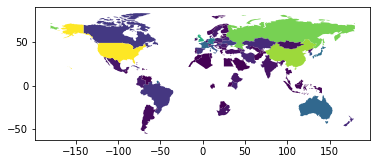

In [18]:
svet_medalja.plot(column = 'Total')

Добили смо шарену мапу, али има још пуно посла да је упристојимо. На пример, не знамо које боје одговарају којим вредностима, да ли су плавичасто обојене државе боље од жутих и зелених? (Ми наравно знамо пошто већ неко време баратамо овим олимпијским подацима, али било ко коме желимо да покажемо наш учинак неће знати.) Додатно, имамо пуно белог простора на местима где знамо да постоје државе - то је зато што те државе нису освојиле медаље па нису део нашег скупа, али и њих желимо некако да прикажемо. Коначно, за приказ ове мапе нам не требају х и у осе, тј. оквир око мапе и то ћемо искључити у наставку:

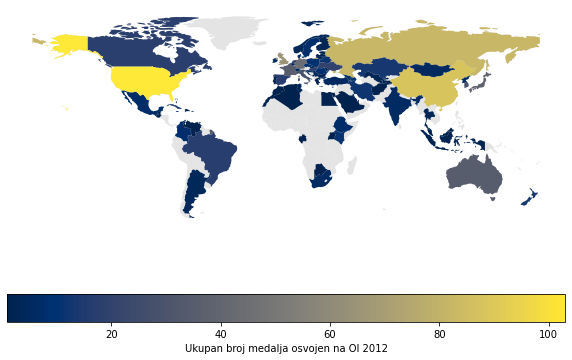

In [19]:
fig, ax = plt.subplots(figsize=(10, 8)) # definisemo sliku malo vecih dimenzija da lepo sagledamo mapu

svet.plot(ax=ax,color='lightgrey',alpha=0.6) # crtamo ceo svet sive boje da bi i zemlje bez medalja postojale na mapi
#preko crtamo prethodno prikazanu mapu
svet_medalja.plot(column = 'Total', # kolona po cijim vrednostima bojimo drzave
                  cmap='cividis', # paleta boja
                  ax=ax, # na ovaj nacin definisemo da se i ova mapa nalazi na istom mestu ao i prethodna 
                  legend=True, # hocemo da imamo legendu da bi znali koja boja odgovara kom broju medalja
                  legend_kwds={'label': "Ukupan broj medalja osvojen na OI 2012",'orientation': "horizontal"}) # ime i pozicija legende
plt.axis('off') # izbacijume x/y ose
plt.show()

Видимо да је велики део света истакнут неком живахнијом бојом од сиве, што значи да је велики број држава освојио бар једну медаљу на олимпијским играма. Видимо да сивих региона (држава које се или нису такмичиле или нису освојиле ни једну медаљу) има много више у јужним деловима света, док су државе најближе жутој боји углавном у северним деловима и означавају типично развијенији и богатији део света (Кина, Русија, Америка, земље западне Европе).

<div class="alert alert-block alert-info"><img src="sport_slike/zad.png" align="left"/>Обојите државе по броју освојених златних медаља.
Помоћ, пре коришћење истог кода, издвојите само оне редове табеле у коме је број златних медаља већи од 0 да не бисте плавом бојом добили истакнуте и оне земље које постоје у скупу података али имају 0 златних медаља. Пробајте и неку другу палету боја: https://matplotlib.org/stable/tutorials/colors/colormaps.html</div> 

In [20]:
# # resenje
# fig, ax = plt.subplots(figsize=(10, 8)) # definisemo sliku malo vecih dimenzija da lepo sagledamo mapu

# svet.plot(ax=ax,color='lightgrey',alpha=0.6) # crtamo ceo svet sive boje da bi i zemlje bez medalja postojale na mapi
# #preko crtamo prethodno prikazanu mapu
# svet_medalja[svet_medalja.Gold>0].plot(column = 'Gold',
#                   ax=ax, # na ovaj nacin definisemo da se i ova mapa nalazi na istom mestu ao i prethodna 
#                   cmap='copper',
#                   legend=True, # hocemo da imamo legendu da bi znali koja boja odgovara kom borju medalja
#                   legend_kwds={'label': "Broj zlatnih medalja osvojen na OI 2012",'orientation': "horizontal"}) # ime i pozicija legende
# plt.axis('off') # izbacijume x/y ose
# plt.show()

У претходним визуелизацијама, поред броја медаља цртали смо и успешност држава у погледу процена тимова који су се са олимпијских игара вратили са медаљом, хајде да видимо да ли се земље са великом успешношћу некако групишу на мапи света:

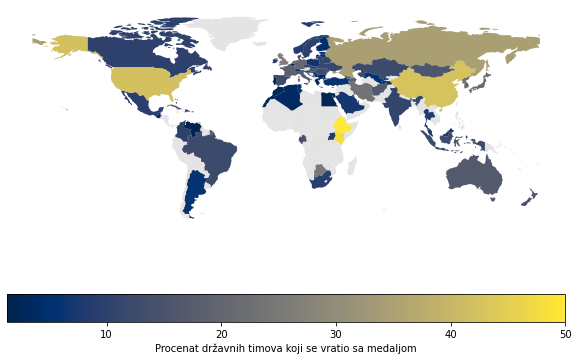

In [21]:
fig, ax = plt.subplots(figsize=(10, 8)) # definisemo sliku malo vecih dimenzija da lepo sagledamo mapu

svet.plot(ax=ax,color='lightgrey',alpha=0.6) # crtamo ceo svet sive boje da bi i zemlje bez medalja postojale na mapi
#preko crtamo prethodno prikazanu mapu
svet_medalja.plot(column = 'Uspesnost_timova',
                  cmap='cividis',
                  ax=ax, # na ovaj nacin definisemo da se i ova mapa nalazi na istom mestu ao i prethodna 
                  legend=True, # hocemo da imamo legendu da bi znali koja boja odgovara kom borju medalja
                  legend_kwds={'label': "Procenat državnih timova koji se vratio sa medaljom",'orientation': "horizontal"}) # ime i pozicija legende
plt.axis('off') # izbacujemo x/y ose
plt.savefig("sport_slike/Mapa_uspesnih_timova_OI2012.svg")
plt.show()

Задржали смо исте боје као на слици са укупним бројем медаља да бисмо лакше уочили прерасподелу победничких земаља. Сада видимо да је пар земаља са највећом успешношћу груписан у Африци, иако је претходн тај регион био обојен тамнијим бојама зато што свеукупно нису освојили пуно медаља. Видимо такође да државе које су освојиле највише медаља (првих пар) свакако има и велику процентуалну успешност, док је за велики број осталих земаља карактеристичније да се тек сваки десети тим који учествује, врати са медаљом кући.

Последњу слику смо и сачували да демонстрирамо употребу функције `savefig` потражите сачувану слику у локалном фолдеру.

Мапе су генерално атрактиван тип визуелизација зато што смо се кроз образовање највише сретали са њима на часовима географије, сви користимо апликације са мапама, стога су доста природан начин комуникације информација. Међутим, треба и са њима, као и са другим визуелизацијама бити опрезан и разумети шта су им предности и мане. Поред поменуте фамилијарности, предност мапа је и у томе што можемо на основу њих генерисати нова питања и хипотезе ако видимо да се државе (или градови или региони ако тако нешто цртамо) које имају сличне показатеље групишу и на основу тога можемо наставити даљу анализу.

Са друге стране, овакве мапе (које на енглеском можете наћи као *choropleth* мапе) као и раније коментарисане табеле нацртане уз помоћ функције *heatmap* нису добар избор ако је ваш циљ да посматрачи прочитај тачан број освојених медаља или тачан проценат успешности на олимпијским играма. Додатно, површина на мапи, односно репрезентација државе везана је за величину државе, али то није нужно квалитет који је кључан за вашу анализу. На пример, и у нашем случају видимо да неке од Европских држава имају упечатљивије боје, али због њихових мањих димензија оне нису тако јако уочљиве као Аустралија или неке друге државе.
Компромисно решење је да у комбинацији са визуелизацијом на мапи, којом комуницирате један део приче на атрактиван начин, кључне вредности које желите да читаоци виде комуницирате поред и неком једноставном а ефектном визуализацијом, на пример, стубићима.

<div class="alert alert-block alert-info"><img src="sport_slike/zad.png" align="left"/>Нацртати мапу са бројем послатих тимова на ои 2012.</div> 

<div class="alert alert-block alert-info"><img src="sport_slike/zad.png" align="left"/>Нацртати мапу на којој су земље обојене "бинарно" тј ако су освојиле бар једну медаљу имају неку боју, а ако нису имају другу.</div>

In [22]:
# # resenje zadatka 2

# svet_medalja['Ima_medalju'] = (svet_medalja['Total']>0)

# fig, ax = plt.subplots(figsize=(10, 8)) # definisemo sliku malo vecih dimenzija da lepo sagledamo mapu

# svet.plot(ax=ax,color='lightgrey',alpha=0.6) # crtamo ceo svet sive boje da bi i zemlje bez medalja postojale na mapi
# #preko crtamo prethodno prikazanu mapu
# svet_medalja.plot(column = 'Ima_medalju',
#                   cmap='cividis',
#                   ax=ax) # na ovaj nacin definisemo da se i ova mapa nalazi na istom mestu ao i prethodna) 
# plt.title('Države koje su osvojile bar jednu medalju na OI 2012')
# plt.axis('off') # izbacujemo x/y ose
# plt.show()

<div class="alert alert-block alert-info"><img src="sport_slike/zad.png" align="left"/>Нацртати мапу укупног броја добијених медаља на зимским олимпијским играма 2014 године (за ово је потребно поновити и анализе из претходне лекције којим припремате податке о медаљама за сваку земљу).
</div> 